In [0]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, ReLU, BatchNormalization, Add, AveragePooling2D, Flatten, Dense

from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D


from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.layers import Dropout, BatchNormalization

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] ## dataset category

In [0]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data() ## load dataset

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [33]:
Y_train.shape

(50000, 1)

(-0.5, 31.5, 31.5, -0.5)

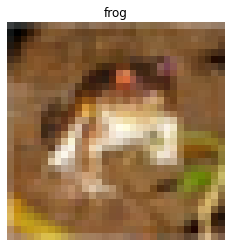

In [8]:
plt.imshow(X_train[0])
plt.title(name_list[Y_train_x[0].squeeze()])
plt.axis("off")

In [0]:


## build relu + bn
def relu_bn(input):
    relu = ReLU()(input)
    bn = BatchNormalization()(relu)
    return bn


In [0]:
## bulid residual bolock

##padding and downsample avoid dim adding problem

def residual_block(x, downsample, filters, kernel_size= 3):

    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)

    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)

    output = Add()([x, y]) ## identity mapping added
    output = relu_bn(output)

    return output

In [0]:
##Create the resnet

inputs = Input(shape=(32, 32, 3))
num_filters = 64
    
t = BatchNormalization()(inputs)
t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
t = relu_bn(t)
    

num_blocks_list = [2, 5, 5, 2]
for i in range(len(num_blocks_list)):
    num_blocks = num_blocks_list[i]

    for j in range(num_blocks):
        t = residual_block(t, downsample = (j==0 and i!=0) , filters=num_filters) 

    num_filters *= 2
    
t = AveragePooling2D(4)(t)
t = Flatten()(t)
outputs = Dense(10, activation='softmax')(t)
    
model = Model(inputs, outputs)

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 32, 32, 3)    12          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 32, 32, 64)   1792        batch_normalization_34[0][0]     
__________________________________________________________________________________________________
re_lu_31 (ReLU)                 (None, 32, 32, 64)   0           conv2d_36[0][0]                  
______________________________________________________________________________________________

In [37]:
from tensorflow import config
config.experimental_run_functions_eagerly(True)

model.fit(X_train,Y_train, batch_size = 100, epochs = 20 ) ## interrupt in 11 epochs

Epoch 1/20
500/500 [==============================] - 192s 384ms/step - loss: 1.5393 - accuracy: 0.4469
Epoch 2/20
500/500 [==============================] - 192s 384ms/step - loss: 1.0993 - accuracy: 0.6127
Epoch 3/20
500/500 [==============================] - 192s 383ms/step - loss: 0.8414 - accuracy: 0.7085
Epoch 4/20
500/500 [==============================] - 192s 383ms/step - loss: 0.7069 - accuracy: 0.7576
Epoch 5/20
500/500 [==============================] - 192s 384ms/step - loss: 0.5889 - accuracy: 0.7990
Epoch 6/20
500/500 [==============================] - 191s 383ms/step - loss: 0.4918 - accuracy: 0.8318
Epoch 7/20
500/500 [==============================] - 191s 382ms/step - loss: 0.4263 - accuracy: 0.8532
Epoch 8/20
500/500 [==============================] - 191s 381ms/step - loss: 0.3670 - accuracy: 0.8753
Epoch 9/20
500/500 [==============================] - 191s 381ms/step - loss: 0.3173 - accuracy: 0.8922
Epoch 10/20
500/500 [==============================] - 191s 382m

KeyboardInterrupt: ignored

In [39]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 27s 87ms/step - loss: 0.6078 - accuracy: 0.8211


[0.6078065633773804, 0.8210999965667725]